In [2]:
import osmnx as ox
# import h3pandas
from h3 import h3
import contextily as cx
import matplotlib.pyplot as plt
import geopandas as gdf
from shapely.geometry import Polygon, MultiPolygon
import numpy as np


# Function to swap lat and lon
def swap_lat_lon(coords):
    return [(lat, lon) for lon, lat in coords]

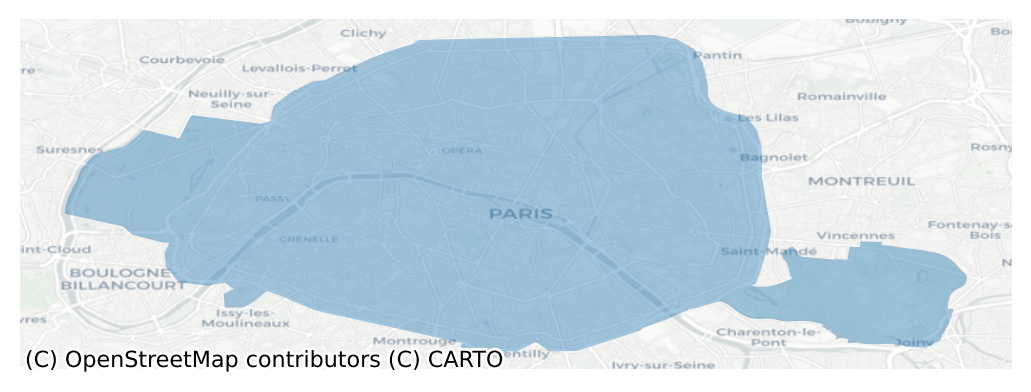

In [2]:
f, ax = plt.subplots(1, 1, dpi=200)
# Define the city and its parameters
city_name = "Paris, France"

# Fetch the city boundary polygon
city = ox.geocode_to_gdf(city_name)

city.plot(ax=ax, alpha=0.4)
cx.add_basemap(ax, crs=city.crs, source=cx.providers.CartoDB.Positron)
ax.set_axis_off()

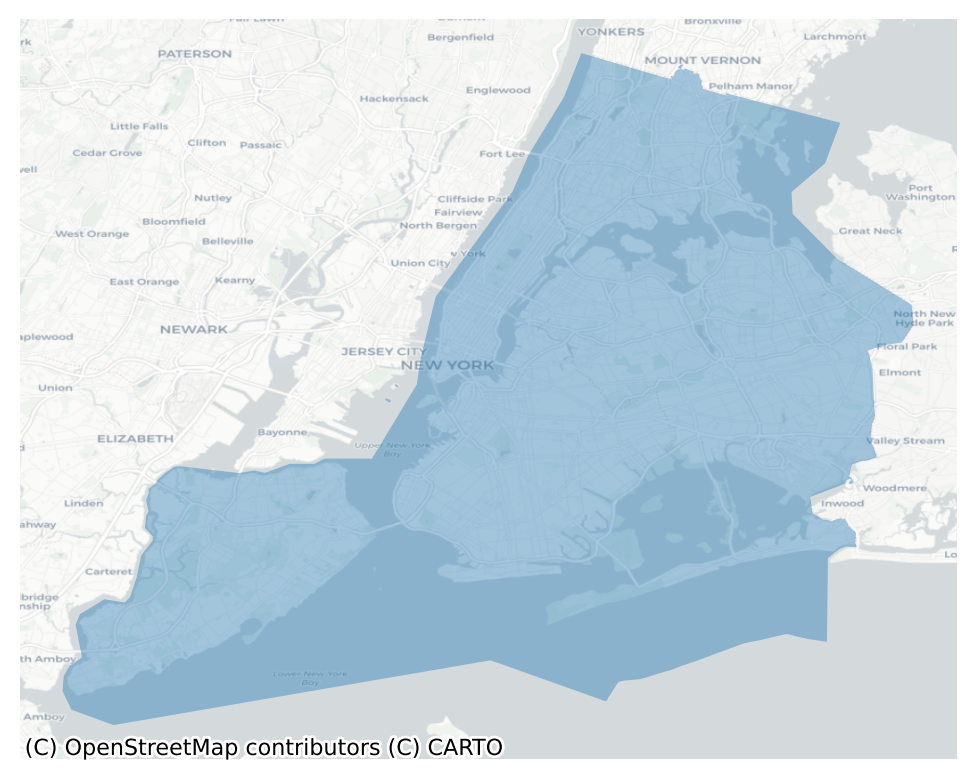

In [3]:
f, ax = plt.subplots(1, 1, dpi=200)
# Define the city and its parameters
city_name = "New York, New York, USA"

# Fetch the city boundary polygon
city = ox.geocode_to_gdf(city_name)

city.plot(ax=ax, alpha=0.4)
cx.add_basemap(ax, crs=city.crs, source=cx.providers.CartoDB.Positron)
ax.set_axis_off()

In [4]:
def get_city_hexagons(city_name: str, resolution: int):
    if not isinstance(resolution, int) or resolution < 0 or resolution > 15:
        raise ValueError("resolution must be an integer between 0 and 15.")
    if not isinstance(city_name, str):
        raise ValueError("city_name must be an string")
    city = ox.geocode_to_gdf(city_name)
    if not isinstance(city, gdf.GeoDataFrame):
        raise ValueError("City not found by Open Street Map")

    geometry = city["geometry"][0]
    if (isinstance(geometry, Polygon)):
        hexagons = h3.polyfill_geojson(geometry.__geo_interface__, resolution)
    elif (isinstance(geometry, MultiPolygon)):
        hexagons = []
        for poly in geometry.geoms:
            hexagons.extend(h3.polyfill_geojson(poly.__geo_interface__, resolution))
    boundaries = [
        {"h": h, "geometry": Polygon(swap_lat_lon(h3.h3_to_geo_boundary(h)))}
        for h in hexagons
    ]
    return boundaries


def get_city_hexagons_geo_df(city_name: str, resolution: int):
    hexagons = get_city_hexagons(city_name, resolution)
    geo_df = gdf.GeoDataFrame(hexagons, crs="EPSG:4326")
    return geo_df


def plot_city_hexagons(city_name: str, resolution: int):
    f, ax = plt.subplots(1, 1, dpi=300)
    city = get_city_hexagons_geo_df(city_name, resolution)

    city.plot(ax=ax, alpha=0.4, edgecolor="black")
    cx.add_basemap(ax, crs=city.crs, source=cx.providers.CartoDB.Positron)
    plt.title(city_name)
    ax.set_axis_off()

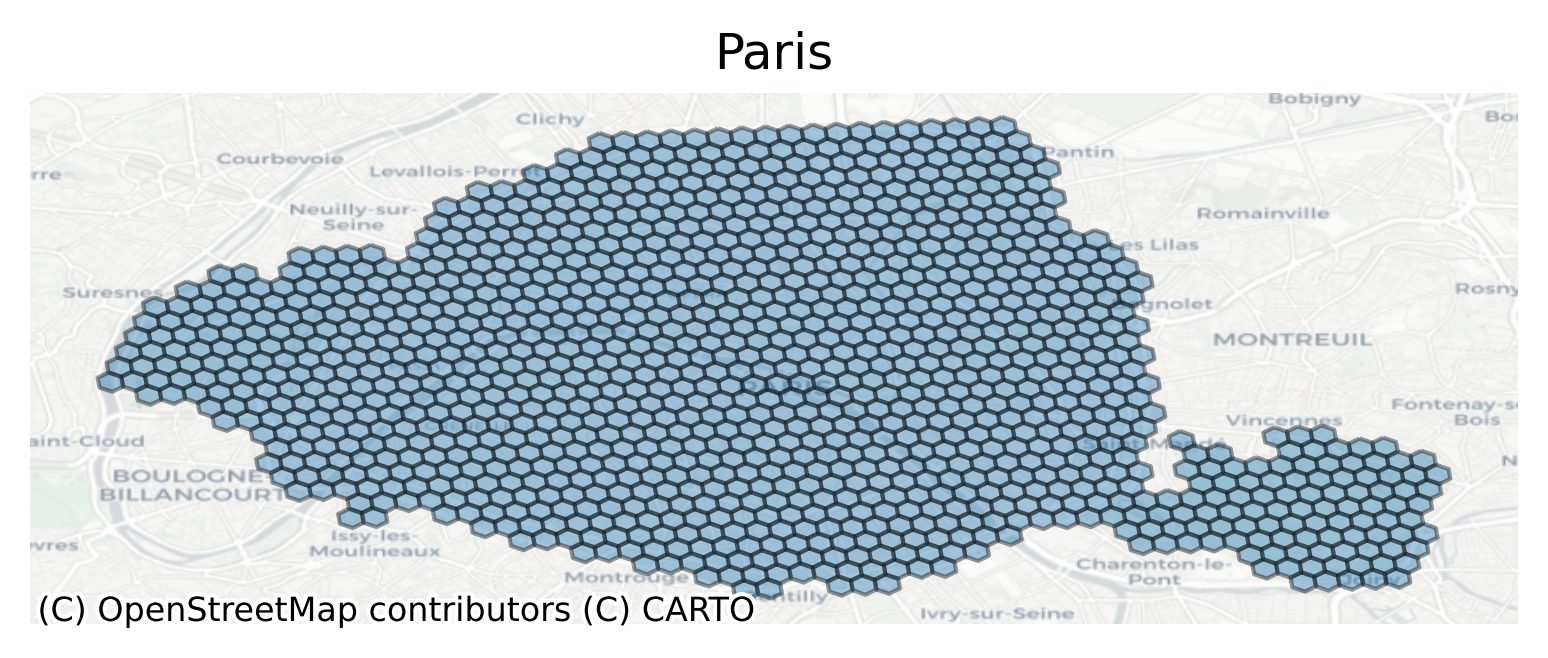

In [5]:
plot_city_hexagons("Paris", 9)

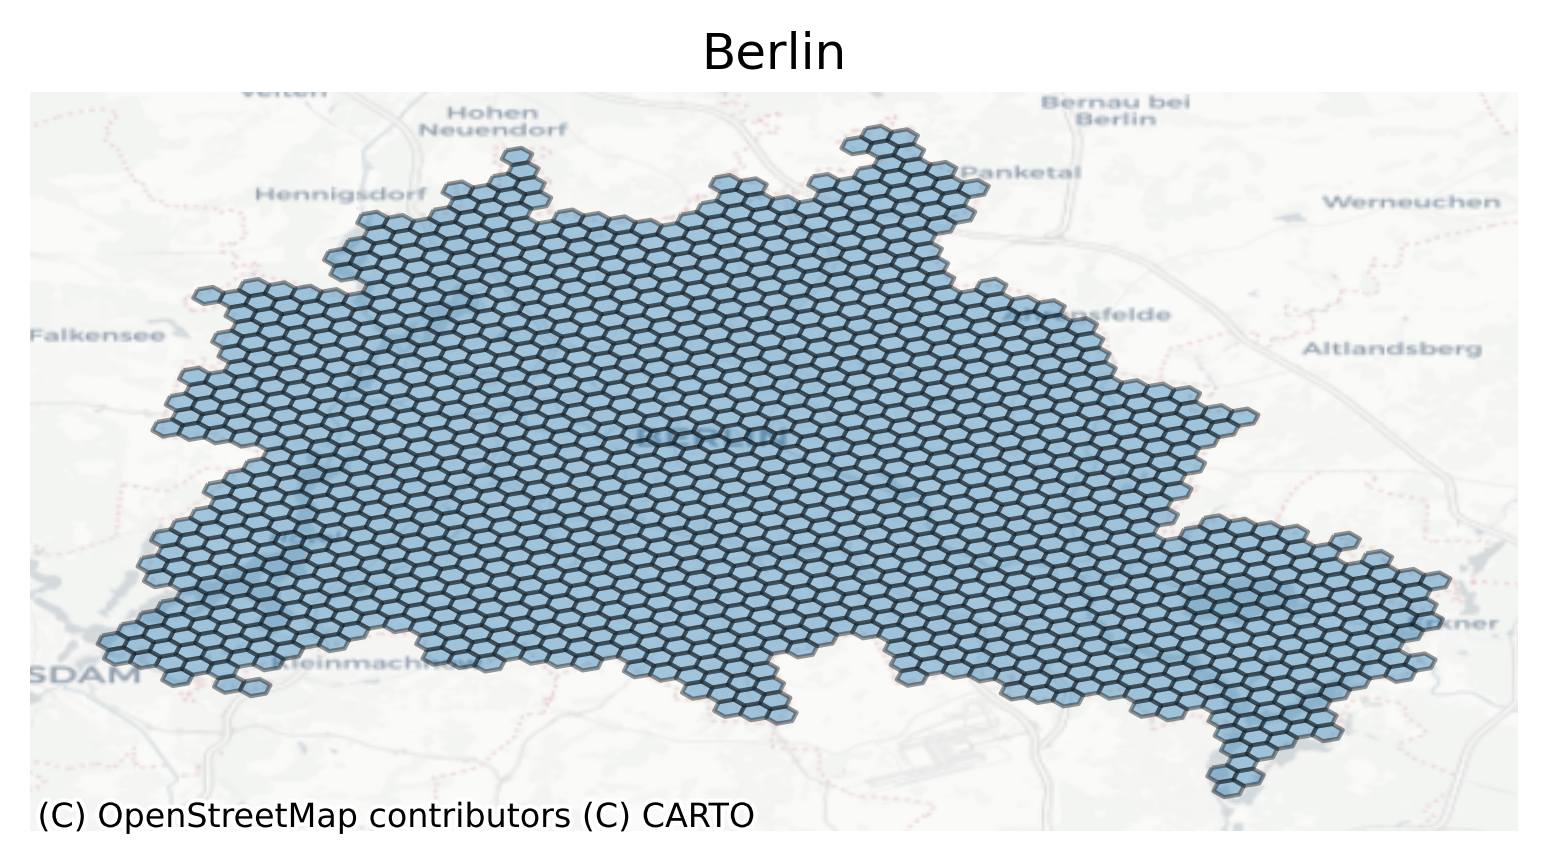

In [6]:
plot_city_hexagons("Berlin", 8)

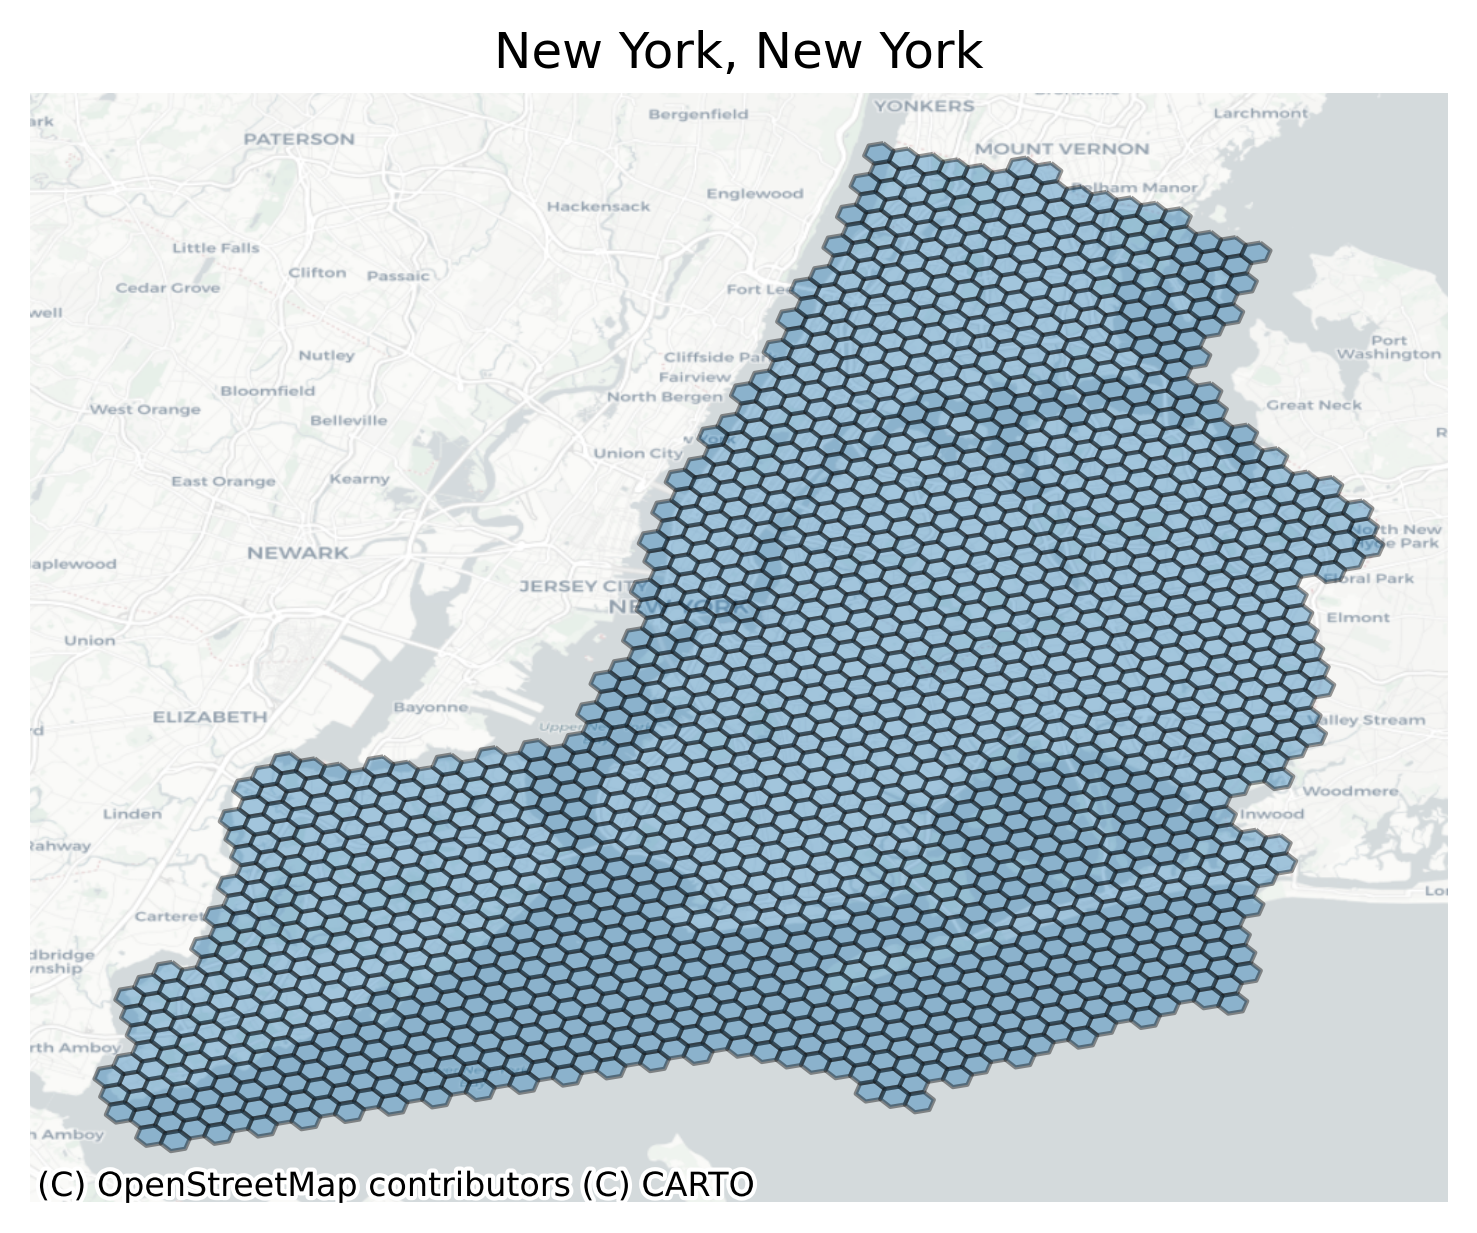

In [7]:
plot_city_hexagons("New York, New York", 8)

In [3]:
df = gdf.read_file("data/Curitiba_resolution_8.geojson")
df.head()

h                                           geometry
0  88a804d91dfffff  POLYGON ((-49.33324 -25.47412, -49.32909 -25.4...
1  88a804cb09fffff  POLYGON ((-49.33951 -25.39161, -49.33536 -25.3...
2  88a804d93dfffff  POLYGON ((-49.31162 -25.46510, -49.30747 -25.4...
3  88a8313623fffff  POLYGON ((-49.23832 -25.45799, -49.23417 -25.4...
4  88a8313663fffff  POLYGON ((-49.23904 -25.47883, -49.23489 -25.4...